# TP 2

## Ejercicio 1

La Transformada Discreta de Fourier (DFT) se utiliza para analizar la distribución energética de
una señal en función de la frecuencia. En las siguientes tres áreas de desempeño laboral de un
ingeniero en electrónica, analice y de un ejemplo lo más detalladamente posible que pueda sobre
para qué y de qué manera se podría utilizar la DFT:

* Predicción climática.
* Telecomunicaciones.
* Producción musical. 

## Ejercicio 2

En un sistema de procesamiento digital de señales que funciona con una determinada $f_s$
(_sampling rate_) se necesita realizar un análisis espectral. Para esto, se cuenta con un bloque DFT
de 256 puntos. Responda: ¿Es posible conocer la frecuencia asociada a cada uno de estos puntos
de la DFT?

## Ejercicio 3

En un sistema de audio que trabaja a una $f_s$ de $48\mathrm{kHz}$ se requiere implementar un ecualizador
con una resolución mínima de $24\mathrm{Hz}$. ¿De cuántos puntos ($N$) debería ser la DFT para lograr esta
resolución? 

## Ejercicio 4

En el caso de que el ejercicio anterior deba implementarse usando una FFT en lugar de una DFT;
¿De cuántos puntos debe ser la FFT como mínimo para cumplir la resolución requerida?

## Ejercicio 5

Una de las opciones de procesamiento del sistema de audio del ejercicio anterior implica una suba
en la $f_s$ a $192\mathrm{kHz}$, permitiendo capacidades de procesamiento de altísimas prestaciones. El
problema de esta implementación es que la capacidad de procesamiento en tiempo real de los
DSP internos no toleran FFT mayores a 8192 puntos. En este caso ¿Se puede implementar un
ecualizador de 20 bandas con una resolución de $25\mathrm{Hz}$. por banda? Con esa resolución: ¿Cuántas
bandas máximas podrán implementarse en este sistema? 

In [1]:
from numericalunits import kHz, Hz

r_max = (192*kHz/8192)
r_max/Hz

23.4375

## Ejercicio 6

¿Qué es el espectro de potencia de una señal? ¿Cómo se calcula y qué resolución tiene este
espectro para una $f_s$ y $N$ ($N$=orden de la DFT) genérica? 

## Ejercicio 7

La siguiente señal digital $x[n]$ proviene del muestreo a 100 muestras por segundo de una señal
analógica que representa la evolución térmica de un equipo. Calcule utilizando las herramientas
de Matlab (o manualmente) espectro de potencia de $x[n]=\begin{bmatrix} 4 & 3 & 2 & 1 \end{bmatrix}$
y grafique. ¿Qué frecuencia representa cada valor del espectro y hasta qué frecuencia es válido dicho espectro? 

## Ejercicio 8

La siguiente figura representa una captura de osciloscopio de una transmisión de datos bajo un
esquema de modulación de portadora única (_single carrier_), y está disponible en el aula virtual
bajo el nombre de `datos_sc.mat`. La adquisición de la señal fue realizada en el punto de recepción a
una tasa de 8000 muestras por segundo, por lo que la misma contiene ruido de diversas
características y atenuaciones en frecuencias aportadas por el canal. Utilice la técnica de
procesamiento de señales que considere más adecuada para determinar la frecuencia fundamental
de la portadora en el sistema de comunicación.

_el gráfico_

### Resolución

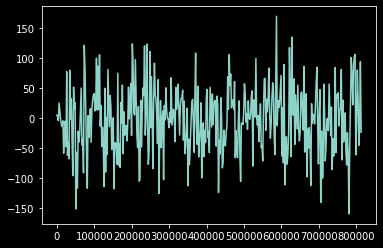

In [2]:
from scipy.io import loadmat
from scipy import signal
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from numericalunits import kHz, Hz, s

resources = Path(".") / "res" / "tp2"

def t_of(x, fs):
    return np.arange(len(x))*1/fs

sc_dat = loadmat(resources / "datos_sc.mat")["x"][0]
sc_freq = 8000*Hz

plt.plot(t_of(sc_dat[:400], 1/sc_freq)/s, sc_dat[:400])

In [3]:
np.shape(sc_dat)

(10000,)

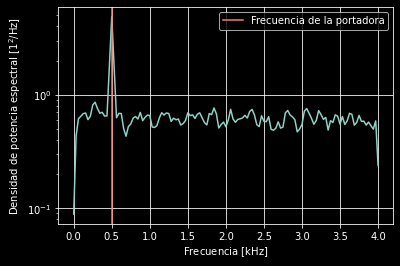

In [4]:
def fs_of(x, fs):
    return np.arange(len(x))*1/fs

sc_fs, sc_powd = signal.welch(sc_dat, fs=sc_freq)
sc_maxpow = sc_fs[np.argmax(sc_powd)]

plt.semilogy(sc_fs/kHz, sc_powd/(1/Hz))
plt.axvline(sc_maxpow/kHz,
    label="Frecuencia de la portadora", color="C3")
plt.xlabel("Frecuencia [$\\mathrm{kHz}$]")
plt.ylabel("Densidad de potencia espectral [$\\mathrm{1^2/Hz}$]")
plt.legend()
plt.grid()

In [5]:
print(f"Frecuencia de portadora: {sc_maxpow/Hz}Hz")

Frecuencia de portadora: 500.0Hz


In [6]:
len(sc_powd)

129

## Ejercicio 9

En un estudio de riqueza en biodiversidad realizado en el Parque Nacional Iguazú, se grabó el
croar de un anfibio el cual se desea conocer su especie. En algunos casos, estos anfibios realizan
sonidos muy similares entre especies, y la única forma de conocer con exactitud de que especie
se trata es determinar las componentes armónicas del croar. Se conoce por estudios previos que
el croar de la Rana Trepadora Misionera (_Hypsiboas caingua_) posee una componente principal
de potencia entorno a los $3 \mathrm{kHz}$, y dos componentes de menor potencia en $6\mathrm{kHz}$ y
$9 \mathrm{kHz}$, mientras
que otras especies del género Hypsiboas poseen su energía concentrada en los $2\mathrm{kHz}$. En base a
la grabación `Hypsiboas_sp.wav` disponible en el aula virtual, determine y demuestre
espectralmente si se trata de la especie H. caingua o no.
Responda además:

1) ¿Cuántas muestras debe tomar para que la estimación sea correcta? Este número de
muestas se conoce como "Ventana de análisis"
2) ¿Cuál es la diferencia entre utilizar los cálculos por FFT y el comando `pwelch`? 

### Resolución

In [7]:
def lnorm(xs):
    return np.asarray(xs)/len(xs)

In [12]:
from scipy.io import wavfile
from utils.misc import Audio, mono

utext = lambda unit: f"[$\\mathrm{{{unit}}}$]"
hyps_freq, hyps_dat = wavfile.read(resources / "Hypsiboas_sp.wav")
hyps_freq = hyps_freq*Hz
Audio(hyps_dat.T, hyps_freq/Hz);

In [10]:
hyps_dat

array([[-3.6010742e-03, -3.6010742e-03],
       [ 6.1035156e-05,  9.1552734e-05],
       [ 6.6833496e-03,  6.7138672e-03],
       ...,
       [-3.8757324e-03, -3.8757324e-03],
       [-1.6357422e-02, -1.6357422e-02],
       [-2.5482178e-02, -2.5482178e-02]], dtype=float32)

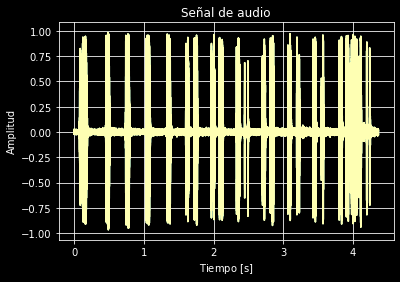

In [10]:
plt.plot(t_of(hyps_dat, hyps_freq)/s, hyps_dat)
plt.grid()
plt.xlabel(f"Tiempo {utext('s')}")
plt.ylabel("Amplitud")
plt.title("Señal de audio");

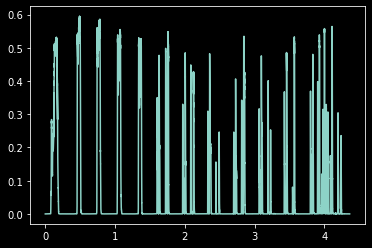

In [11]:
# Detector de actividad para determinar tramos significativos del audio (prueba)
plt.plot(
    t_of(hyps_dat, hyps_freq)/s,
    np.convolve(mono(hyps_dat)**2, np.ones(100)/100, mode="same"))

La ventanas de análisis se toman de forma que comprenda un sector activo del audio, esta amplitud
de tiempo puede estar relacionada con la duración de una "plantilla" de referencia, por ejemplo.

In [12]:
def rfseries(x, fs, **kwargs):
    """
    Calcula los coeficientes para la descomposición en series
    de Fourier de la secuencia `x`
    """
    x = np.asarray(x)
    return (
        np.fft.rfftfreq(len(x), 1/fs),
        np.fft.rfft(x, **kwargs)/len(x)
    )

def famp(x):
    x = np.asarray(x)
    return np.concatenate([[1], np.ones(len(x)-1)*2]) * x

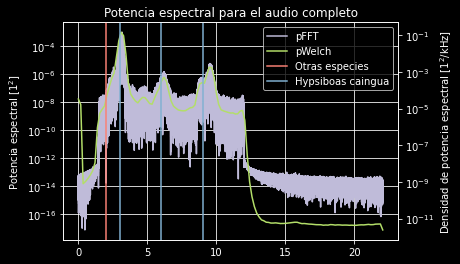

In [13]:
hyps_fs, hyps_powd = signal.welch(mono(hyps_dat), fs=hyps_freq)
hyps_s_fs, hyps_s_cs = rfseries(mono(hyps_dat), hyps_freq)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.set_title("Potencia espectral para el audio completo")
ax2.set_xlabel("Frecuencia [$\\mathrm{kHz}$]")
ax2.set_ylabel("Densidad de potencia espectral [$\\mathrm{1^2/kHz}$]")
ax1.set_ylabel("Potencia espectral [$\\mathrm{1^2}$]")

ax1.semilogy(hyps_s_fs/kHz, famp(abs(hyps_s_cs))**2, color="C2", label="pFFT")
ax2.semilogy(hyps_fs/kHz, hyps_powd/(1/kHz), color="C6", label="pWelch")
ax2.axvline(2, color="C3", label="Otras especies")

ax2.axvline(3, color="C4", label="Hypsiboas caingua")
ax2.axvline(6, color="C4")
ax2.axvline(9, color="C4")

fig.legend(
    bbox_transform = ax1.transAxes,
    bbox_to_anchor = (0, 0, 1, 1)
)
ax1.grid()

La diferencia entre los dos resultados radica en la reducción de resolución que
requiere analizar el problema en "bins", mientras que el método utilizando
FFT no reduce la resolución ya que toma el rango completo. La desventaja de utilizar
el rango completo es que la serie de tiempo debe cargarse de manera completa en la
memoria RAM del DSP.